### Load data from previous notebook

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_boston
%matplotlib inline


def standardize(x):
    return (x - np.mean(x)) / np.std(x)


boston = load_boston()
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['target'] = boston.target
x_range = [dataset['RM'].min(), dataset['RM'].max()]
y_range = [dataset['target'].min(), dataset['target'].max()]

# Linear Regression

Linear regression defines a straight line through a given set of points minimizing the sum of the squared errors.

Its expression is:
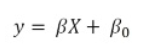

X = matrix of predictors<br />
β = matrix of coefficients<br />
β0 = constant value (bias)<br />

### Using statsmodels

In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

y = dataset['target']
X = dataset['RM']
X = sm.add_constant(X)

X.head()

,const,RM
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998
4,1.0,7.147


#### Method 1

In [5]:
linear_regression = sm.OLS(y, X)
fitted_model = linear_regression.fit()

#### Method 2

In [6]:
linear_regression = smf.ols(formula='target ~ RM', data=dataset)
fitted_model = linear_regression.fit()

In [7]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Mon, 16 Oct 2017   Prob (F-statistic):           2.49e-74
Time:                        10:27:21   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
fitted_model.params

Intercept   -34.670621
RM            9.102109
dtype: float64

In [11]:
betas = np.array(fitted_model.params)
fitted_values = fitted_model.predict(X)
fitted_values.head()

0    25.175746
1    23.774021
2    30.728032
3    29.025938
4    30.382152
dtype: float64

### Coefficient of Determination

In [27]:
mean_sum_squared_errors = np.sum((dataset['target'] - dataset['target'].mean())**2)
regr_sum_squared_errors = np.sum((dataset['target'] - fitted_values)**2)
(mean_sum_squared_errors - regr_sum_squared_errors) / mean_sum_squared_errors

0.48352545599133434

In [30]:
from scipy.stats.stats import pearsonr

(pearsonr(dataset['RM'], dataset['target'])[0])**2

0.4835254559913339

### Evaluating the Fitted Values

In [38]:
residuals = dataset['target'] - fitted_values
normalized_residuals = standardize(residuals)
normalized_residuals.head()

0   -0.178060
1   -0.329244
2    0.601533
3    0.662428
4    0.881082
dtype: float64

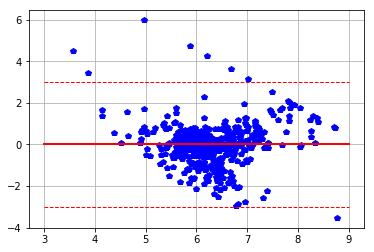

In [43]:
residual_scatter_plot = plt.plot(dataset['RM'], normalized_residuals, 'bp')
mean_residual = plt.plot([int(x_range[0]), round(x_range[1], 0)], [0, 0], '-', color='red', linewidth=2)
upper_bound = plt.plot([int(x_range[0]), round(x_range[1], 0)], [3, 3], '--', color='red', linewidth=1)
lower_bound = plt.plot([int(x_range[0]), round(x_range[1], 0)], [-3, -3], '--', color='red', linewidth=1)
plt.grid()